<center>


<h1>Proyecto Propedeutico de Programación:

El indice de marginalización de México </h1>


<p><img src="https://avatars.githubusercontent.com/u/60750757?s=280&v=4" width="200">
</p>

<h2> Autor: Ivan Dario Davila Peralta</h2>

</center>

En este notebook se vera cada paso de como se analizo la base de datos de CONAPO usando pandas.

Se descargan todas las librerias necesarias para este trabajo. Entre ellas pandas numpy y matplotlib.

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Se descargar y Leer el archivo de Base de Datos por Municipio 2020 del índice de marginación desde la página de descargas del gobierno federal mexicano en un dataframe. Los datos se encuentran en la pestaña "IMM 2020.

In [79]:
link = "http://www.conapo.gob.mx/work/models/CONAPO/Marginacion/Datos_Abiertos/Municipio/IMM_2020.xls"

data_mncpio = pd.read_excel(link, header=5)
data_mncpio.head(5)

,CVE_ENT,NOM_ENT,CVE_MUN,NOM_MUN,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,GM_2020,IMN_2020,Unnamed: 17
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Nacional,NaN,NaN,NaN,126014024.0,4.752150,29.713764,1.469115,0.660563,3.667182,3.807968,19.732297,26.999922,66.884043,—,—,—,—
2,01,Aguascalientes,1001.0,Aguascalientes,948990.0,1.644738,20.367220,0.104799,0.113169,0.378610,0.591434,10.339530,7.523683,54.226594,60.318795,Muy bajo,0.944508,2435
3,01,Aguascalientes,1002.0,Asientos,51536.0,3.526405,33.906364,2.650373,0.486448,0.858160,1.352430,22.942305,78.221049,78.565471,56.546071,Muy bajo,0.885433,1816
4,01,Aguascalientes,1003.0,Calvillo,58250.0,4.491509,42.482450,0.365177,0.516760,0.800978,1.040411,19.219858,51.301288,79.259777,57.058251,Muy bajo,0.893453,1932


En este caso, la primeras fila son datos vacios que fueron utilizados para darle formato al archivo excel; y al mismo tiempo, la segunda fila es utilizada para dar la sumatoria nacional de estos. Se descartan estas dos columnas.

In [80]:
# descartamos las dos primeras filas
data_mncpio = data_mncpio.drop([0,1, 2471, 2472])

In [81]:
# Descripcion del data frame
data_mncpio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2469 entries, 2 to 2470
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CVE_ENT      2469 non-null   object 
 1   NOM_ENT      2469 non-null   object 
 2   CVE_MUN      2469 non-null   float64
 3   NOM_MUN      2469 non-null   object 
 4   POB_TOT      2469 non-null   float64
 5   ANALF        2469 non-null   float64
 6   SBASC        2469 non-null   float64
 7   OVSDE        2469 non-null   float64
 8   OVSEE        2469 non-null   float64
 9   OVSAE        2469 non-null   float64
 10  OVPT         2469 non-null   float64
 11  VHAC         2469 non-null   float64
 12  PL.5000      2469 non-null   float64
 13  PO2SM        2469 non-null   float64
 14  IM_2020      2469 non-null   object 
 15  GM_2020      2469 non-null   object 
 16  IMN_2020     2469 non-null   object 
 17  Unnamed: 17  2469 non-null   object 
dtypes: float64(11), object(7)
memory usage: 366.5+ K

In [82]:
#Descripcion de datos numericos
data_mncpio.describe(include="float64")

,CVE_MUN,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM
count,2469.000000,2.469000e+03,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000
mean,19324.164844,5.103849e+04,10.164466,45.853026,3.159963,1.500793,6.118145,7.987232,26.566286,69.900469,82.143854
std,7382.892458,1.469907e+05,7.633633,13.981594,5.289299,2.769167,9.245995,8.973591,10.586540,35.267726,11.830444
min,1001.000000,8.100000e+01,0.353446,5.535137,0.000000,0.000000,0.000000,0.000000,3.950392,0.000000,28.453113
25%,14079.000000,4.489000e+03,4.427755,35.737568,0.651869,0.366077,0.878499,1.654653,18.725100,40.129696,74.615600
50%,20226.000000,1.355200e+04,8.202762,46.339439,1.428250,0.828157,2.452316,4.714141,25.000000,100.000000,84.643266
75%,24027.000000,3.528400e+04,13.787294,55.856378,3.342618,1.678328,7.285869,11.029646,32.820816,100.000000,91.620112
max,32058.000000,1.922523e+06,53.071253,88.328076,64.450424,53.065463,81.788441,68.149764,69.564018,100.000000,100.000000


In [83]:
#descripcion de datos categoricos
data_mncpio.describe(include="object")

,CVE_ENT,NOM_ENT,NOM_MUN,IM_2020,GM_2020,IMN_2020,Unnamed: 17
count,2469,2469,2469,2469.000000,2469,2469.000000,2469
unique,32,32,2328,2469.000000,5,2469.000000,2469
top,20,Oaxaca,Benito Juárez,60.318795,Muy bajo,0.944508,2435
freq,570,570,7,1.000000,655,1.000000,1


In [84]:
#Contamos cuantas variables son numericas y cuales son categoricas.
numeric_cols = data_mncpio.select_dtypes(include=['float64', 'int']).columns
cat_cols = data_mncpio.select_dtypes(include=['object', 'category']).columns
print(f"Datos numericos: {len(numeric_cols)}")
print(f"Datos cateoricos: {len(cat_cols)}")

Datos numericos: 11
Datos cateoricos: 7


In [85]:
#Al parecer la ultima categoria del lugar que ocupa a nivel nacional
#Renombraremos esta variable por IND_NACI0NAL
data_mncpio.rename(columns = {'Unnamed: 17':'IND_NACI0NAL'}, inplace = True)
data_mncpio.columns

Index(['CVE_ENT', 'NOM_ENT', 'CVE_MUN', 'NOM_MUN', 'POB_TOT', 'ANALF', 'SBASC',
       'OVSDE', 'OVSEE', 'OVSAE', 'OVPT', 'VHAC', 'PL.5000', 'PO2SM',
       'IM_2020', 'GM_2020', 'IMN_2020', 'IND_NACI0NAL'],
      dtype='object')

In [86]:
#imprimimos los 5 municipios mas marginados a nivel nacional.
data_mncpio.sort_values("IND_NACI0NAL").head(5)

,CVE_ENT,NOM_ENT,CVE_MUN,NOM_MUN,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,GM_2020,IMN_2020,IND_NACI0NAL
215,08,Chihuahua,8008.0,Batopilas de Manuel Gómez Morín,11270.0,45.522928,84.480764,57.185439,53.065463,23.693002,56.070461,47.251167,100.0,93.463561,21.406635,Muy alto,0.335198,1
304,10,Durango,10014.0,Mezquital,48583.0,22.869092,57.154172,38.949868,42.404533,50.631232,50.820128,55.670326,100.0,82.785739,28.222995,Muy alto,0.441933,2
948,18,Nayarit,18009.0,Del Nayar,47550.0,27.268016,66.476111,64.450424,32.724169,31.887197,47.535342,54.015839,100.0,86.138199,28.670142,Muy alto,0.448935,3
601,14,Jalisco,14061.0,Mezquitic,22083.0,24.746515,63.047846,60.415671,30.726577,31.012900,46.076978,37.489361,100.0,79.963235,31.305668,Muy alto,0.490203,4
453,12,Guerrero,12078.0,Cochoapa el Grande,21241.0,53.071253,82.818533,61.039822,9.957858,18.310526,43.647900,61.519905,100.0,91.121495,32.205441,Muy alto,0.504292,5


In [87]:
#de igual manera imprimimos los municipios menos marginados.
data_mncpio.sort_values("IND_NACI0NAL").tail(5)

,CVE_ENT,NOM_ENT,CVE_MUN,NOM_MUN,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,GM_2020,IMN_2020,IND_NACI0NAL
965,19,Nuevo León,19006.0,Apodaca,656464.0,0.736270,11.873313,0.002763,0.014276,0.051578,0.334830,10.754394,2.701748,40.892191,61.315874,Muy bajo,0.960121,2465
288,09,Ciudad de México,9015.0,Cuauhtémoc,545884.0,0.952548,13.528740,0.054147,0.029113,0.108849,0.122046,9.417070,0.000000,41.394890,61.328534,Muy bajo,0.960319,2466
1005,19,Nuevo León,19046.0,San Nicolás de los Garza,412199.0,0.957916,15.005994,0.004859,0.017977,0.021136,0.480435,6.701794,0.000000,41.147158,61.418383,Muy bajo,0.961726,2467
978,19,Nuevo León,19019.0,San Pedro Garza García,132169.0,1.015566,11.659507,0.003942,0.033893,0.037049,0.305738,6.202640,0.031021,32.817872,61.845548,Muy bajo,0.968415,2468
287,09,Ciudad de México,9014.0,Benito Juárez,434153.0,0.353446,5.535137,0.007413,0.010425,0.020387,0.068141,3.950392,0.000000,28.453113,62.397145,Muy bajo,0.977052,2469


In [88]:
mun_po_estado = data_mncpio.groupby(["NOM_ENT"])["NOM_MUN"].count()
mun_po_estado

NOM_ENT
Aguascalientes                      11
Baja California                      6
Baja California Sur                  5
Campeche                            12
Chiapas                            124
Chihuahua                           67
Ciudad de México                    16
Coahuila de Zaragoza                38
Colima                              10
Durango                             39
Guanajuato                          46
Guerrero                            81
Hidalgo                             84
Jalisco                            125
Michoacán de Ocampo                113
Morelos                             36
México                             125
Nayarit                             20
Nuevo León                          51
Oaxaca                             570
Puebla                             217
Querétaro                           18
Quintana Roo                        11
San Luis Potosí                     58
Sinaloa                             18
Sonora           

<AxesSubplot:xlabel='NOM_ENT'>

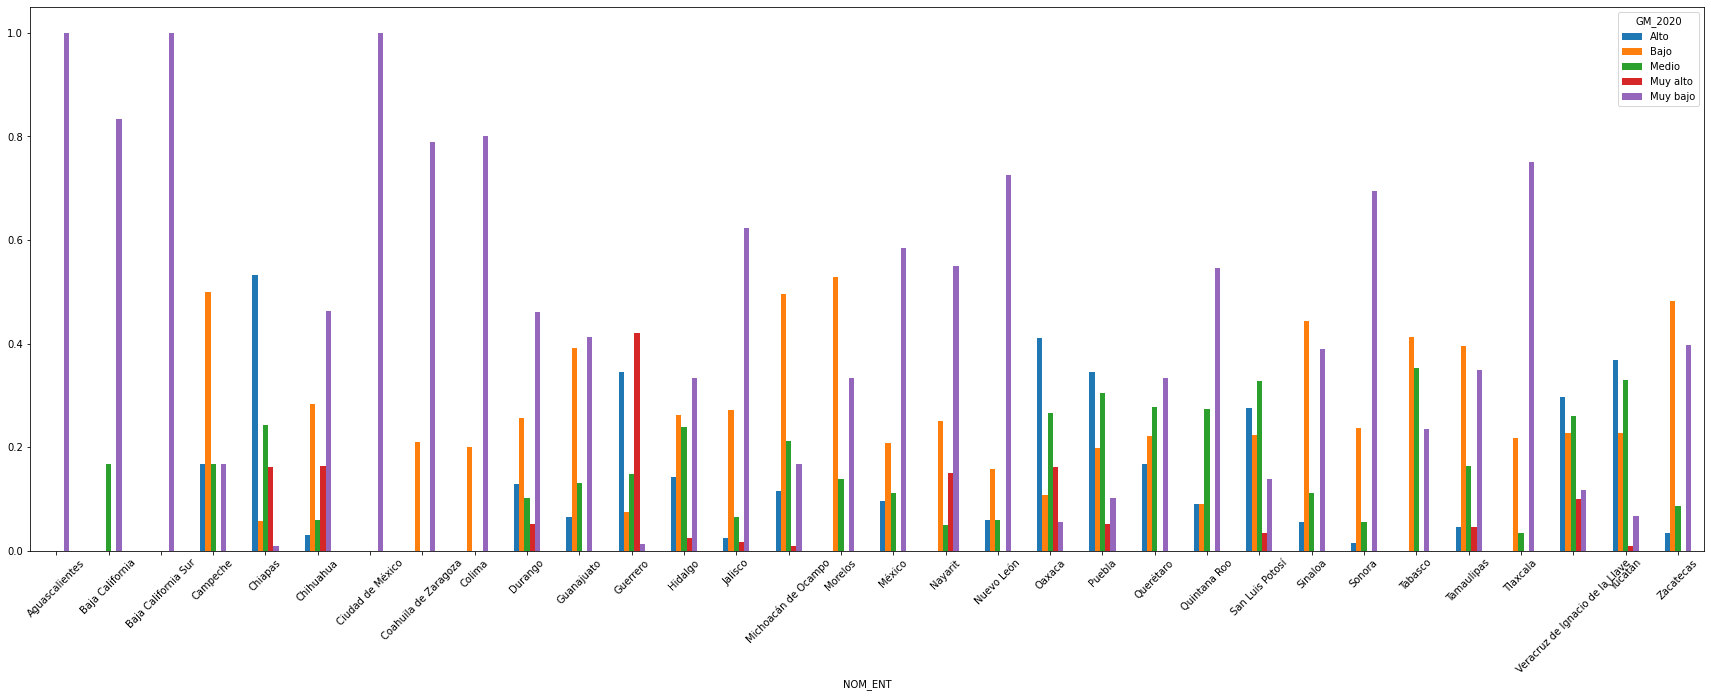

In [178]:
ind_mun_por_estado = data_mncpio.groupby(["NOM_ENT", "GM_2020"])["NOM_MUN"].count()
ind_mun_por_estado = ind_mun_por_estado/mun_po_estado
ind_mun_por_estado = ind_mun_por_estado.unstack()
ind_mun_por_estado.fillna(0).plot(kind="bar",figsize=(30,10), rot=45)

<AxesSubplot:xlabel='NOM_ENT'>

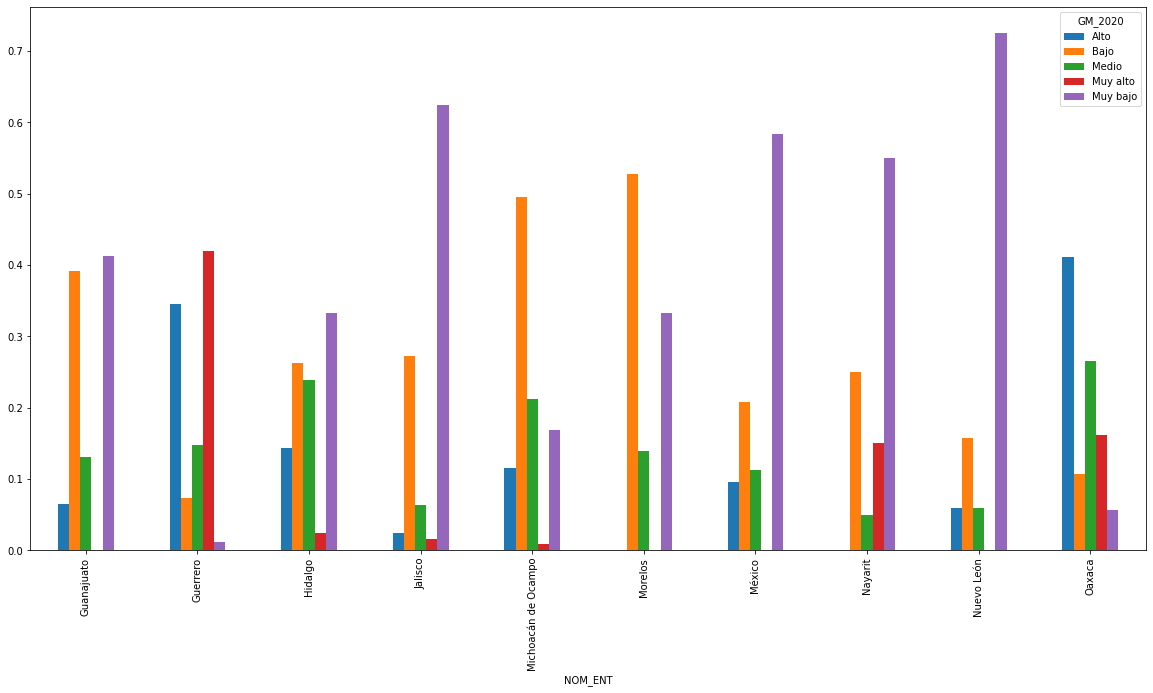

In [174]:
ind_mun_por_estado.fillna(0).iloc[10:20].plot(kind="bar",figsize=(20,10))